# 컴피티션 링크
- https://www.kaggle.com/t/2e45abe9f1434b59a3358365432a48bb

# 고객별 백화점 구매기록 데이터셋
- 미혼(1) or 기혼(0) 고객을 예측
- 학습용 구매기록 데이터
    - https://drive.google.com/file/d/1tg41qXu02FK55bFa8P1Gx2URhwPUCoQQ/view?usp=sharing
- 학습용 정답 데이터
    - https://drive.google.com/file/d/1-9AcU9nAoO4SzSmqdCOYTvWNpA5Pdt3q/view?usp=sharing
- 테스트용 구매기록 데이터
    - https://drive.google.com/file/d/1-AwDfGlHm9rNtpnHIWOK96jBJYy3f2SZ/view?usp=sharing
- 제출 양식 데이터
    - https://drive.google.com/file/d/1-Qv7SlsY5Eu3bRR7Z0IUJyLkOO1Fl3y6/view?usp=sharing

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [21]:
DATA_PATH = "/content/drive/MyDrive/data/"
DATA_PATH

'/content/drive/MyDrive/data/'

- 데이터 불러오기

In [22]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

In [23]:
from IPython.display import display, HTML
br_html = HTML("<br><br>")
display(HTML("<h1>학습용 구매기록 데이터</h1>"), train_tr.head(), br_html)
display(HTML("<h1>학습용 정답 데이터</h1>"), train_target.head(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"), test_tr.head(), br_html)
display(HTML("<h1>제출 양식 데이터</h1>"), submit.head(), br_html)

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000


,ID,target
0,train_0,1.0
1,train_1,1.0
2,train_2,0.0
3,train_3,0.0
4,train_4,0.0


,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,test_3366,2004-05-01 10:20:00,A373000,생식품,건식품,5100,7000
1,test_9389,2004-05-01 10:23:00,A373000,명품잡화,스타킹,5104,46000
2,test_8190,2004-05-01 10:30:00,A144000,잡화파트,수입종합화장품,5106,260000
3,test_8835,2004-05-01 10:30:00,A144000,잡화파트,준보석,5107,17000
4,test_1167,2004-05-01 10:30:00,A373000,남성의류,셔츠,5108,138000


,ID,target
0,test_0,0.5
1,test_1,0.5
2,test_2,0.5
3,test_3,0.5
4,test_4,0.5


In [24]:
display(HTML("<h1>학습용 구매기록 데이터</h1>"))
display(train_tr.info(), br_html)

display(HTML("<h1>학습용 정답 데이터</h1>"))
display(train_target.info(), br_html)

display(HTML("<h1>테스트용 구매기록 데이터</h1>"))
display(test_tr.info(), br_html)

display(HTML("<h1>제출 양식 데이터</h1>"))
display(submit.info(), br_html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523105 entries, 0 to 523104
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      523105 non-null  object
 1   구매일시    523105 non-null  object
 2   지점코드    523105 non-null  object
 3   대분류     523105 non-null  object
 4   중분류     523105 non-null  object
 5   브랜드코드   523105 non-null  int64 
 6   구매가격    523105 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 27.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      14940 non-null  object 
 1   target  14940 non-null  float64
dtypes: float64(1), object(1)
memory usage: 233.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441196 entries, 0 to 441195
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      441196 non-null  object
 1   구매일시    441196 non-null  object
 2   지점코드    441196 non-null  object
 3   대분류     441196 non-null  object
 4   중분류     441196 non-null  object
 5   브랜드코드   441196 non-null  int64 
 6   구매가격    441196 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 23.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12225 entries, 0 to 12224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      12225 non-null  object 
 1   target  12225 non-null  float64
dtypes: float64(1), object(1)
memory usage: 191.1+ KB


None

# 특성 공학(Feature Engineering)

## 날짜 형식으로 변환

In [25]:
train_tr["구매일시"] = pd.to_datetime(train_tr["구매일시"])
test_tr["구매일시"] = pd.to_datetime(test_tr["구매일시"])

## 새로 만든 feature와 병합할 고객ID로만 이루어진 데이터프레임 생성

In [26]:
train_ft = train_target[["ID"]]
test_ft = submit[["ID"]]

train_ft.shape, test_ft.shape

((14940, 1), (12225, 1))

## 구매일시를 이용한 특성생성

In [27]:
agg_list = [
        # 컬럼명, 집계 방식
        ('내점일수','nunique'),
        ('구매주기', lambda x: int( (x.max() - x.min()).days / x.dt.date.nunique()) ),
        ('주말방문비율', lambda x: np.mean(x.dt.weekday>4)),
        ('봄_구매비율', lambda x: np.mean(x.dt.month.isin([3,4,5]))),
        ('여름_구매비율', lambda x: np.mean(x.dt.month.isin([6,7,8]))),
        ('가을_구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
        ('겨울_구매비율', lambda x: np.mean(x.dt.month.isin([1,2,12]))),
        ('주구매요일', lambda x: x.dt.weekday.mode()[0]),
        ('일별평균구매건수', lambda x:  x.count() / x.dt.date.nunique() ),
        ('거래개월수', lambda x: x.dt.date.astype(str).str[:-3].nunique() ),
        ('1월_구매비율', lambda x: np.mean(x.dt.month == 1)),
        ('2월_구매비율', lambda x: np.mean(x.dt.month == 2)),
        ('3월_구매비율', lambda x: np.mean(x.dt.month == 3)),
        ('4월_구매비율', lambda x: np.mean(x.dt.month == 4)),
        ('5월_구매비율', lambda x: np.mean(x.dt.month == 5)),
        ('6월_구매비율', lambda x: np.mean(x.dt.month == 6)),
        ('7월_구매비율', lambda x: np.mean(x.dt.month == 7)),
        ('8월_구매비율', lambda x: np.mean(x.dt.month == 8)),
        ('9월_구매비율', lambda x: np.mean(x.dt.month == 9)),
        ('10월_구매비율', lambda x: np.mean(x.dt.month == 10)),
        ('11월_구매비율', lambda x: np.mean(x.dt.month == 11)),
        ('12월_구매비율', lambda x: np.mean(x.dt.month == 12)),
    ]

tmp = train_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left',on="ID")
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,3월_구매비율,4월_구매비율,5월_구매비율,6월_구매비율,7월_구매비율,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0.000000,0.000000,0.050000,0.150000,0.100000,0.000000,0.200000,0.000000,0.200000,0.250000
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0.142857,0.047619,0.166667,0.023810,0.023810,0.119048,0.238095,0.047619,0.071429,0.071429
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0.114035,0.184211,0.166667,0.052632,0.061404,0.026316,0.078947,0.043860,0.052632,0.026316
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0.137441,0.161137,0.080569,0.075829,0.090047,0.014218,0.075829,0.066351,0.094787,0.071090
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0.032258,0.000000,0.080645,0.161290,0.322581,0.129032,0.145161,0.048387,0.016129,0.000000


In [28]:
tmp = test_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left',on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,3월_구매비율,4월_구매비율,5월_구매비율,6월_구매비율,7월_구매비율,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0.0,0.0000,0.285714,0.142857,0.142857,0.0000,0.00000,0.428571,0.0,0.00000
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0.0,0.0000,0.000000,0.000000,0.000000,0.0000,0.25000,0.500000,0.0,0.00000
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0.0,0.0000,0.000000,0.000000,0.000000,0.6000,0.40000,0.000000,0.0,0.00000
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0.0,0.0625,0.000000,0.000000,0.281250,0.1875,0.09375,0.250000,0.0,0.09375
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0.0,0.0000,0.380952,0.000000,0.285714,0.0000,0.00000,0.238095,0.0,0.00000


## 지점을 이용한 특성생성

In [29]:
agg_list = [
          ("방문지점수","nunique"),
          ('주구매지점', lambda x: x.mode()[0]),
    ]

tmp = train_tr.groupby('ID')["지점코드"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left',on="ID")
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,5월_구매비율,6월_구매비율,7월_구매비율,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0.050000,0.150000,0.100000,0.000000,0.200000,0.000000,0.200000,0.250000,2,A144000
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0.166667,0.023810,0.023810,0.119048,0.238095,0.047619,0.071429,0.071429,3,A112000
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0.166667,0.052632,0.061404,0.026316,0.078947,0.043860,0.052632,0.026316,2,A373000
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0.080569,0.075829,0.090047,0.014218,0.075829,0.066351,0.094787,0.071090,3,A144000
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0.080645,0.161290,0.322581,0.129032,0.145161,0.048387,0.016129,0.000000,2,A144000


In [30]:
tmp = test_tr.groupby('ID')["지점코드"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left',on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,5월_구매비율,6월_구매비율,7월_구매비율,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0.285714,0.142857,0.142857,0.0000,0.00000,0.428571,0.0,0.00000,1,A202000
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0.000000,0.000000,0.000000,0.0000,0.25000,0.500000,0.0,0.00000,2,A373000
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0.000000,0.000000,0.000000,0.6000,0.40000,0.000000,0.0,0.00000,1,A144000
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0.000000,0.000000,0.281250,0.1875,0.09375,0.250000,0.0,0.09375,1,A112000
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0.380952,0.000000,0.285714,0.0000,0.00000,0.238095,0.0,0.00000,3,A112000


In [78]:
train_ft[['방문지점수']].value_counts()

,count
방문지점수,
1,7161
2,5769
3,1804
4,206


## 브랜드코드를 이용한 특성생성

In [32]:
agg_list = [
             ('브랜드코드_nunique', 'nunique'),
             ]

tmp = train_tr.groupby('ID')["브랜드코드"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left',on="ID")
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,6월_구매비율,7월_구매비율,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점,브랜드코드_nunique
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0.150000,0.100000,0.000000,0.200000,0.000000,0.200000,0.250000,2,A144000,13
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0.023810,0.023810,0.119048,0.238095,0.047619,0.071429,0.071429,3,A112000,26
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0.052632,0.061404,0.026316,0.078947,0.043860,0.052632,0.026316,2,A373000,58
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0.075829,0.090047,0.014218,0.075829,0.066351,0.094787,0.071090,3,A144000,99
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0.161290,0.322581,0.129032,0.145161,0.048387,0.016129,0.000000,2,A144000,23


In [33]:
tmp = test_tr.groupby('ID')["브랜드코드"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left',on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,6월_구매비율,7월_구매비율,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점,브랜드코드_nunique
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0.142857,0.142857,0.0000,0.00000,0.428571,0.0,0.00000,1,A202000,5
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0.000000,0.000000,0.0000,0.25000,0.500000,0.0,0.00000,2,A373000,4
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0.000000,0.000000,0.6000,0.40000,0.000000,0.0,0.00000,1,A144000,5
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0.000000,0.281250,0.1875,0.09375,0.250000,0.0,0.09375,1,A112000,19
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0.000000,0.285714,0.0000,0.00000,0.238095,0.0,0.00000,3,A112000,13


## 중분류를 이용한 특성생성

In [34]:
agg_list = [
            ('중분류_nunique', 'nunique'),
            ('주구매_중분류', lambda x: x.mode()[0]),
            ]
tmp = train_tr.groupby('ID')["중분류"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0.000000,0.200000,0.000000,0.200000,0.250000,2,A144000,13,11,골프웨어
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0.119048,0.238095,0.047619,0.071429,0.071429,3,A112000,26,24,영캐주얼
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0.026316,0.078947,0.043860,0.052632,0.026316,2,A373000,58,35,아웃도어
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0.014218,0.075829,0.066351,0.094787,0.071090,3,A144000,99,60,수입종합화장품
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0.129032,0.145161,0.048387,0.016129,0.000000,2,A144000,23,24,로얄부틱2F


In [35]:
tmp = test_tr.groupby('ID')["중분류"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,8월_구매비율,9월_구매비율,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0.0000,0.00000,0.428571,0.0,0.00000,1,A202000,5,4,용기보증
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0.0000,0.25000,0.500000,0.0,0.00000,2,A373000,4,4,남성구두
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0.6000,0.40000,0.000000,0.0,0.00000,1,A144000,5,4,수입종합화장품
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0.1875,0.09375,0.250000,0.0,0.09375,1,A112000,19,12,수입종합화장품
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0.0000,0.00000,0.238095,0.0,0.00000,3,A112000,13,12,칼라드래디셔널


## 대분류를 이용한 특성생성

In [36]:
agg_list = [
            ('대분류_nunique', 'nunique'),
            ('주구매_대분류', lambda x: x.mode()[0]),
            ]

tmp = train_tr.groupby('ID')["대분류"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류,대분류_nunique,주구매_대분류
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0.000000,0.200000,0.250000,2,A144000,13,11,골프웨어,9,남성정장스포츠
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0.047619,0.071429,0.071429,3,A112000,26,24,영캐주얼,12,영플라자
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0.043860,0.052632,0.026316,2,A373000,58,35,아웃도어,14,명품잡화
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0.066351,0.094787,0.071090,3,A144000,99,60,수입종합화장품,16,케주얼_구두_아동
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0.048387,0.016129,0.000000,2,A144000,23,24,로얄부틱2F,8,명품잡화


In [37]:
tmp = test_tr.groupby('ID')["대분류"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,10월_구매비율,11월_구매비율,12월_구매비율,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류,대분류_nunique,주구매_대분류
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0.428571,0.0,0.00000,1,A202000,5,4,용기보증,5,공산품
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0.500000,0.0,0.00000,2,A373000,4,4,남성구두,3,명품잡화
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0.000000,0.0,0.00000,1,A144000,5,4,수입종합화장품,3,잡화파트
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0.250000,0.0,0.09375,1,A112000,19,12,수입종합화장품,5,영플라자
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0.238095,0.0,0.00000,3,A112000,13,12,칼라드래디셔널,6,여성캐주얼


## 구매가격을 이용한 특성생성

In [38]:
agg_list = [
        ('총구매액','sum'),
        ('구매건수', 'count'),
        ('평균구매액', "mean"),
        ('최대구매액', 'max'),
        ('최소구매액',lambda x: x[x > 0].min() ) ,
        ('환불금액',lambda x: x[x < 0].sum() ) ,
        ('환불건수', lambda x: ( x < 0 ).sum() ),
        ('구매금액표준편차',lambda x: x[x>0].std() ),
    ]

tmp = train_tr.groupby('ID')["구매가격"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,대분류_nunique,주구매_대분류,총구매액,구매건수,평균구매액,최대구매액,최소구매액,환불금액,환불건수,구매금액표준편차
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,9,남성정장스포츠,4201200,20,210060.000000,1236000,20000,-2517000,3,403660.245259
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,12,영플라자,5043025,42,120072.023810,698000,5600,0,0,126592.626144
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,14,명품잡화,22135386,114,194170.052632,2770000,4400,-1072500,7,406609.265932
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,16,케주얼_구두_아동,35594762,211,168695.554502,1492000,10000,-2867800,14,236976.860907
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,8,명품잡화,3988866,62,64336.548387,1204000,7640,-6954400,13,308503.944915


In [39]:
tmp = test_tr.groupby('ID')["구매가격"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,대분류_nunique,주구매_대분류,총구매액,구매건수,평균구매액,최대구매액,최소구매액,환불금액,환불건수,구매금액표준편차
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,5,공산품,429579,7,61368.428571,110000,26643,0,0,32293.148313
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,3,명품잡화,290600,4,72650.000000,118000,37600,0,0,33658.431336
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,3,잡화파트,607000,5,121400.000000,326000,38000,0,0,117233.954126
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,5,영플라자,2305740,32,72054.375000,403000,7040,-1092000,4,122556.774972
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,6,여성캐주얼,1568690,21,74699.523810,376000,16200,-372200,3,94997.232393


# pivot_table을 이용한 특성 생성

In [40]:
train_tmp = pd.pivot_table(train_tr,index="ID",columns="중분류",values="구매가격",aggfunc="count",fill_value=0).add_prefix("pivot_cnt_").reset_index()
train_ft = train_ft.merge(train_tmp,how="left",on="ID")
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_행사슈즈,pivot_cnt_행사핸드백,pivot_cnt_향수,pivot_cnt_헤어ACC,pivot_cnt_헤어악세사리,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,0,0,0,0,0,0,0,0
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,0,0,0,0,0,0,0,0
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,0,0,0,0,0,0,0,0
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0,0,0,3,0,0,0,2,0,0
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,0,0,0,0,0,0,0,0


In [41]:
test_tr.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,test_3366,2004-05-01 10:20:00,A373000,생식품,건식품,5100,7000
1,test_9389,2004-05-01 10:23:00,A373000,명품잡화,스타킹,5104,46000
2,test_8190,2004-05-01 10:30:00,A144000,잡화파트,수입종합화장품,5106,260000
3,test_8835,2004-05-01 10:30:00,A144000,잡화파트,준보석,5107,17000
4,test_1167,2004-05-01 10:30:00,A373000,남성의류,셔츠,5108,138000


In [42]:
test_tmp = pd.pivot_table(test_tr,index="ID",columns="중분류",values="구매가격",aggfunc="count",fill_value=0).add_prefix("pivot_cnt_").reset_index()
test_tmp.head()

중분류,ID,pivot_cnt_DC캐주얼,pivot_cnt_GBR 지원,pivot_cnt_L_B침구,pivot_cnt_NB제화,pivot_cnt_NB핸드백,pivot_cnt_N_B침구,pivot_cnt_TOP디자이너,pivot_cnt_TV.VTR,pivot_cnt_TV_VCR,...,pivot_cnt_행사슈즈,pivot_cnt_행사핸드백,pivot_cnt_향수,pivot_cnt_헤어ACC,pivot_cnt_헤어악세사리,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱
0,test_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,test_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,test_10,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,test_100,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,test_1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
for col in train_tmp.columns:
    if col not in test_tmp.columns:
        test_tmp[col] = 0

test_tmp = test_tmp[train_tmp.columns]

In [44]:
test_ft = test_ft.merge(test_tmp,how="left",on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_행사슈즈,pivot_cnt_행사핸드백,pivot_cnt_향수,pivot_cnt_헤어ACC,pivot_cnt_헤어악세사리,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0,0,0,0,0,0,0,0,0,0
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0,0,0,0,0,0,0,0,0,0
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0,0,0,0,0,0,0,0,0,0
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0,0,0,0,0,0,0,0,0,0
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train_ft.shape, test_ft.shape

((14940, 341), (12225, 341))

# 기존 피처

## 구매주기가 잦고 거래개월수가 긴 피처



In [46]:
train_ft['많은_구매주기'] = train_ft['구매주기'] < train_ft['구매주기'].median()
train_ft['많은_거래개월수'] = train_ft['거래개월수'] > train_ft['거래개월수'].median()
train_ft['구매주기_거래개월'] = train_ft['많은_거래개월수'] & train_ft['많은_구매주기']

train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_헤어ACC,pivot_cnt_헤어악세사리,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,0,0,0,0,0,False,False,False
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,0,0,0,0,0,True,True,True
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,0,0,0,0,0,True,True,True
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,3,0,0,0,2,0,0,True,True,True
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,0,0,0,0,0,True,True,True


In [47]:
test_ft['많은_구매주기'] = train_ft['구매주기'] < train_ft['구매주기'].median()
test_ft['많은_거래개월수'] = train_ft['거래개월수'] > train_ft['거래개월수'].median()
test_ft['구매주기_거래개월'] = train_ft['많은_거래개월수'] & train_ft['많은_구매주기']

test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_헤어ACC,pivot_cnt_헤어악세사리,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0,0,0,0,0,0,0,False,False,False
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0,0,0,0,0,0,0,True,True,True
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0,0,0,0,0,0,0,True,True,True
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0,0,0,0,0,0,0,True,True,True
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0,0,0,0,0,0,0,True,True,True


In [48]:
train_ft.shape, test_ft.shape

((14940, 344), (12225, 344))

## 최소구매액 이 10000 이상이고 최대구매액 이 중앙값 초과인 피처

In [49]:
train_ft['많은_구매액'] = (train_ft['최소구매액'] >= 10000) & (train_ft['최대구매액'] > train_ft['최대구매액'].median())
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_헤어악세사리,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,0,0,0,0,False,False,False,True
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,0,0,0,0,True,True,True,False
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,0,0,0,0,True,True,True,False
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0,0,0,2,0,0,True,True,True,True
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,0,0,0,0,True,True,True,False


In [50]:
test_ft['많은_구매액'] = (train_ft['최소구매액'] >= 10000) & (train_ft['최대구매액'] > train_ft['최대구매액'].median())
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_헤어악세사리,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0,0,0,0,0,0,False,False,False,True
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0,0,0,0,0,0,True,True,True,False
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0,0,0,0,0,0,True,True,True,False
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0,0,0,0,0,0,True,True,True,True
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0,0,0,0,0,0,True,True,True,False


In [51]:
train_ft.shape, test_ft.shape

((14940, 345), (12225, 345))

# 새롭게 추가한 피처

## 아동이 포함된 카테고리만

In [52]:
# train_tr[train_tr["대분류"].str.contains('아동')]['대분류'].unique()

In [ ]:
# train_tr[train_tr["중분류"].str.contains('아동')]['중분류'].unique()

In [53]:
agg_list = [
            ('대분류_아동_cnt', lambda x: x.str.contains('아동').sum())
            ]

tmp = train_tr.groupby('ID')["대분류"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

tmp = test_tr.groupby('ID')["대분류"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_헤어액세사리,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0,0,0,0,0,False,False,False,True,2
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0,0,0,0,0,True,True,True,False,0
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0,0,0,0,0,True,True,True,False,2
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0,0,0,0,0,True,True,True,True,0
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0,0,0,0,0,True,True,True,False,5


In [54]:
agg_list = [
            ('중분류_아동_cnt', lambda x: x.str.contains('아동').sum())
            ]

tmp = train_tr.groupby('ID')["중분류"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

tmp = test_tr.groupby('ID')["중분류"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0,0,0,0,False,False,False,True,2,2
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0,0,0,0,True,True,True,False,0,0
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0,0,0,0,True,True,True,False,2,0
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0,0,0,0,True,True,True,True,0,0
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0,0,0,0,True,True,True,False,5,0


In [55]:
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,0,0,False,False,False,True,2,1
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,0,0,True,True,True,False,1,0
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,0,0,True,True,True,False,18,0
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0,2,0,0,True,True,True,True,57,0
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,0,0,True,True,True,False,8,3


In [56]:
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_홈데코,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,0,0,0,0,False,False,False,True,2,2
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,0,0,0,0,True,True,True,False,0,0
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,0,0,0,0,True,True,True,False,2,0
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,0,0,0,0,True,True,True,True,0,0
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,0,0,0,0,True,True,True,False,5,0


In [57]:
train_ft.shape, test_ft.shape

((14940, 347), (12225, 347))

In [ ]:
# 대분류 또는 중분류에 포함되는 피처

In [58]:
train_ft['아동카테고리_구입'] = (train_ft['대분류_아동_cnt'] > 0) | (train_ft['중분류_아동_cnt'] > 0)
train_ft

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt,아동카테고리_구입
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,0,False,False,False,True,2,1,True
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,0,True,True,True,False,1,0,True
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,0,True,True,True,False,18,0,True
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,2,0,0,True,True,True,True,57,0,True
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,0,True,True,True,False,8,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,train_14935,16,24,0.210526,0.000000,0.578947,0.052632,0.368421,2,1.900000,...,0,0,0,False,False,False,False,4,2,True
14936,train_14936,8,29,0.125000,0.125000,0.625000,0.250000,0.000000,0,1.000000,...,0,0,0,False,False,False,True,2,0,True
14937,train_14937,22,26,0.083333,0.208333,0.458333,0.208333,0.125000,1,2.000000,...,0,0,0,False,True,False,False,3,0,True
14938,train_14938,31,28,0.151515,0.393939,0.393939,0.212121,0.000000,3,2.750000,...,0,0,0,False,False,False,False,0,0,False


In [59]:
test_ft['아동카테고리_구입'] = (test_ft['대분류_아동_cnt'] > 0) | (test_ft['중분류_아동_cnt'] > 0)
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_화장잡화,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt,아동카테고리_구입
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,0,False,False,False,True,2,1,True
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,0,True,True,True,False,1,0,True
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,0,True,True,True,False,18,0,True
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,2,0,0,True,True,True,True,57,0,True
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,0,True,True,True,False,8,3,True


In [60]:
train_ft.shape, test_ft.shape

((14940, 348), (12225, 348))

## 로얄 미구매

In [61]:
train_ft['로얄_미구매'] = train_tr['대분류'].str.contains('로얄') == 0
test_ft['로얄_미구매'] = test_tr['대분류'].str.contains('로얄') == 0

In [62]:
train_ft = train_ft.drop(columns=['로얄_미구매'])
test_ft = test_ft.drop(columns=['로얄_미구매'])

In [63]:
train_ft.shape, test_ft.shape

((14940, 348), (12225, 348))

## 가족 단위 구매 비율

In [64]:
train_ft['가족단위_구매비율'] = train_ft['대분류_아동_cnt'] + train_ft['중분류_아동_cnt'] / train_ft['구매건수']

In [65]:
test_ft['가족단위_구매비율'] = test_ft['대분류_아동_cnt'] + test_ft['중분류_아동_cnt'] / test_ft['구매건수']

In [66]:
train_ft.shape, test_ft.shape

((14940, 349), (12225, 349))

# 중간 저장

In [67]:
train_ft.to_csv(f"{DATA_PATH}train_tmp.csv",index=False)
test_ft.to_csv(f"{DATA_PATH}test_tmp.csv",index=False)

In [113]:
train_tmp = pd.read_csv(f"{DATA_PATH}train_tmp.csv")
test_tmp = pd.read_csv(f"{DATA_PATH}test_tmp.csv")

In [114]:
train_ft = train_tmp.copy()
test_ft = test_tmp.copy()

In [115]:
train_ft.shape, test_ft.shape

((14940, 349), (12225, 349))

In [295]:
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt,아동카테고리_구입,가족단위_구매비율
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,False,False,False,True,2,1,True,2.050000
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,True,True,True,False,1,0,True,1.000000
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,True,True,True,False,18,0,True,18.000000
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0,0,True,True,True,True,57,0,True,57.000000
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,True,True,True,False,8,3,True,8.048387


In [236]:
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt,아동카테고리_구입,가족단위_구매비율
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,False,False,False,True,2,1,True,2.050000
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,True,True,True,False,1,0,True,1.000000
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,True,True,True,False,18,0,True,18.000000
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0,0,True,True,True,True,57,0,True,57.000000
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,True,True,True,False,8,3,True,8.048387


In [237]:
train_tr.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000


In [238]:
test_tr.head()

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,test_3366,2004-05-01 10:20:00,A373000,생식품,건식품,5100,7000
1,test_9389,2004-05-01 10:23:00,A373000,명품잡화,스타킹,5104,46000
2,test_8190,2004-05-01 10:30:00,A144000,잡화파트,수입종합화장품,5106,260000
3,test_8835,2004-05-01 10:30:00,A144000,잡화파트,준보석,5107,17000
4,test_1167,2004-05-01 10:30:00,A373000,남성의류,셔츠,5108,138000


# 11월 1일 새로운 피처

In [101]:
import matplotlib.pyplot as plt

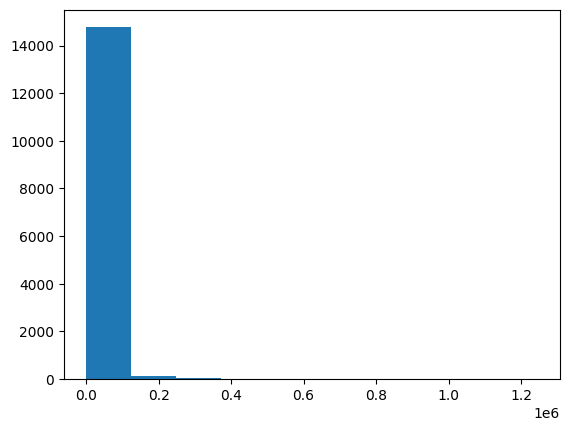

In [104]:
fig, ax = plt.subplots()
ax.hist(train_ft['최소구매액'])
plt.show()

In [92]:
(train_ft['최소구매액'].quantile([0.25, 0.5, 0.75]))

,최소구매액
0.25,7000.0
0.50,12000.0
0.75,22000.0


In [116]:
train_ft['많은_구매액'] = (train_ft['최소구매액'] >= 12000) & (train_ft['최대구매액'] > train_ft['최대구매액'].median())
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,pivot_cnt_화장품,pivot_cnt_훼미닌부틱,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt,아동카테고리_구입,가족단위_구매비율
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,0,0,False,False,False,True,2,1,True,2.050000
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,0,0,True,True,True,False,1,0,True,1.000000
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,0,0,True,True,True,False,18,0,True,18.000000
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,0,0,True,True,True,False,57,0,True,57.000000
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,0,0,True,True,True,False,8,3,True,8.048387


In [117]:
test_ft['많은_구매액'] = (train_ft['최소구매액'] >= 12000) & (train_ft['최대구매액'] > train_ft['최대구매액'].median())

In [118]:
train_ft.shape, test_ft.shape

((14940, 349), (12225, 349))

## 18시 이전/이후 구매 비율

In [119]:
agg_list = [
        # 컬럼명, 집계 방식
        ('18시이전구매비율', lambda x: np.mean(x.dt.hour < 18)),
        ('18시이후구매비율', lambda x: np.mean(x.dt.hour >= 18)),
    ]

tmp = train_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left',on="ID")
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt,아동카테고리_구입,가족단위_구매비율,18시이전구매비율,18시이후구매비율
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,False,False,False,True,2,1,True,2.050000,0.750000,0.250000
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,True,True,True,False,1,0,True,1.000000,0.690476,0.309524
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,True,True,True,False,18,0,True,18.000000,0.850877,0.149123
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,True,True,True,False,57,0,True,57.000000,0.777251,0.222749
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,True,True,True,False,8,3,True,8.048387,0.838710,0.161290


In [120]:
tmp = test_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left',on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,많은_구매주기,많은_거래개월수,구매주기_거래개월,많은_구매액,대분류_아동_cnt,중분류_아동_cnt,아동카테고리_구입,가족단위_구매비율,18시이전구매비율,18시이후구매비율
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,False,False,False,True,2,2,True,2.285714,1.000000,0.000000
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,True,True,True,False,0,0,False,0.000000,1.000000,0.000000
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,True,True,True,False,2,0,True,2.000000,1.000000,0.000000
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,True,True,True,False,0,0,False,0.000000,0.468750,0.531250
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,True,True,True,False,5,0,True,5.000000,0.428571,0.571429


In [121]:
train_ft.shape, test_ft.shape

((14940, 351), (12225, 351))

In [122]:
test_ft.isnull().sum()

,0
ID,0
내점일수,0
구매주기,0
주말방문비율,0
봄_구매비율,0
...,...
중분류_아동_cnt,0
아동카테고리_구입,0
가족단위_구매비율,0
18시이전구매비율,0


## 평일 18시 이후 구매 비율

In [84]:
weekday = train_tr['구매일시'].dt.weekday < 5
hour = train_tr['구매일시'].dt.hour >= 18

agg_list = [
        # 컬럼명, 집계 방식
        ('평일_18시_구매비율', np.mean([weekday & hour])),

    ]

train_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()


TypeError: 'numpy.float64' object is not callable

In [82]:
train_ft = train_ft.merge(tmp, how='left',on="ID")
train_ft.head()

,구매일시
0,False
1,False
2,False
3,False
4,False
...,...
523100,True
523101,True
523102,True
523103,True


# 항상 확인하기
- 학습데이터와 테스트 데이터의 피처개수는 동일해야 함

In [75]:
train_ft.shape, test_ft.shape

((14940, 351), (12225, 351))

# 추출한 피처 저장하기

In [123]:
train_ft.to_csv(f"{DATA_PATH}train_common.csv",index=False)
test_ft.to_csv(f"{DATA_PATH}test_common.csv",index=False)